# ナップサック問題をGAで解く

対応する動画：[遺伝的アルゴリズムでナップサック問題を解く【研究で使うPython #41】](https://youtu.be/XlXGDr2eV-w)

動画のプレイリスト：[研究で使うPython](https://www.youtube.com/playlist?list=PLw5AEs-T7pLHxLaNvGD9tnhrDxAgH-QIw)

## 必要モジュールのインポート

In [1]:
import random
import copy
import numpy as np
from statistics import mean
import matplotlib.pyplot as plt

## 個体（エージェント）クラスの定義

In [2]:
class Agent:
    # 初期化
    def __init__(self, M):
        # 遺伝子の初期化
        self.gene = [random.randint(0,1) for i in range(M)]
        self.weight = 0   # 重さ
        self.fitness = 0  # 適応度（価値の合計）
    
    # 適応度計算
    def calc_fitness(self, items, MAX_WEIGHT):
        self.weight = sum([n*item[0] for n, item in zip(self.gene, items)])
        self.fitness = sum([n*item[1] for n, item in zip(self.gene, items)])
        if self.weight > MAX_WEIGHT: # 制限重量を超えたら適応度0
            self.fitness = 0        

## シミュレーションクラスの定義

In [3]:
class Simulation:
    # 初期化
    def __init__(self, items, max_weight, N):
        self.items = items           # アイテムをタプルのリストとして受け取る
        self.max_weight = max_weight # 制限重量
        self.N = N                   # 個体数
        self.mutation_rate = 0.1     # 突然変異率
        
        # 個体群の生成
        self.population = [Agent(len(self.items)) for i in range(self.N)]
        # 次世代の個体群
        self.offspring = []
        
    # ルーレット選択
    def roulette_selection(self):
        roulette = []
        for i in self.population:
            roulette.append(i.fitness)
           
        probs = np.array(roulette)/sum(roulette)
        
        parent = []
        for i in range(2):
            selected = np.random.choice(self.population, p=probs)
            parent.append(copy.deepcopy(selected))
    
        return parent
    
    # 一点交叉
    def crossover(self, parent1, parent2):
        r = random.randint(0, len(parent1.gene)-1)
        offspring1 = copy.deepcopy(parent1)
        offspring2 = copy.deepcopy(parent2)
        offspring1.gene[r:] = parent2.gene[r:]
        offspring2.gene[r:] = parent1.gene[r:]

        # 次世代プールに追加
        self.offspring.append(offspring1)
        self.offspring.append(offspring2)
    
    # 突然変異
    def mutate(self, agent):
        r = random.choice(range(len(agent.gene)))
        agent.gene[r] = 1 if agent.gene[r] == 0 else 0
        
    # 世代交代    
    def generation_change(self):
        self.population.clear()
        self.population = copy.deepcopy(self.offspring)
        self.offspring.clear()

    # ナップサック問題を解く（=GAで個体群を進化させる）
    def solve(self):
        # 平均適応度，最大適応度をリストに追加
        mean_list.append(self.mean_fitness())
        max_list.append(self.max_fitness())
        
        # 適応度計算
        for agent in self.population:
            agent.calc_fitness(self.items, self.max_weight)
            
        # 個体群の情報出力
        self.print_population()

        # 選択，交叉
        while len(self.offspring) < len(self.population):
            parent = self.roulette_selection()
            self.crossover(parent[0], parent[1])

        # 突然変異
        for agent in self.population:
            if random.random() < self.mutation_rate:
                self.mutate(agent)
        # 世代交代    
        self.generation_change()
    
    # 個体群の情報出力
    def print_population(self):
        for i in self.population:
            print(i.gene, i.fitness)
    
    # 集団の平均適応度
    def mean_fitness(self):
        fitness = []
        for i in self.population:
            fitness.append(i.fitness)
            
        return mean(fitness)
            
    # 集団の最大適応度
    def max_fitness(self):
        fitness = []
        for i in self.population:
            fitness.append(i.fitness)
        
        return max(fitness)

## シミュレーションの実行

ITEMS: [(7, 25), (6, 16), (2, 17), (6, 0), (10, 59), (7, 75), (10, 30), (9, 13), (3, 55), (12, 96)]
generation: 0
[0, 1, 0, 1, 0, 1, 1, 1, 1, 1] 0
[1, 0, 1, 1, 1, 0, 1, 0, 1, 0] 0
[1, 0, 1, 0, 1, 1, 0, 0, 1, 1] 0
[0, 1, 1, 1, 0, 1, 0, 0, 1, 0] 163
[1, 1, 1, 0, 0, 1, 1, 0, 1, 0] 218
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0] 29
[1, 1, 1, 0, 1, 0, 1, 0, 0, 0] 147
[0, 0, 1, 0, 1, 1, 0, 1, 1, 1] 0
[1, 1, 0, 1, 0, 1, 0, 1, 1, 0] 0
[1, 1, 0, 1, 1, 0, 0, 1, 1, 0] 0
generation: 1
[0, 1, 1, 1, 0, 0, 1, 0, 0, 0] 63
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0] 247
[0, 1, 1, 1, 0, 1, 1, 0, 1, 0] 193
[1, 1, 1, 0, 0, 1, 0, 0, 1, 0] 188
[0, 1, 0, 1, 0, 0, 0, 1, 0, 0] 29
[1, 1, 1, 0, 1, 0, 1, 0, 0, 0] 147
[1, 1, 1, 0, 0, 1, 1, 0, 1, 0] 218
[0, 1, 1, 1, 0, 1, 0, 0, 1, 0] 163
[0, 1, 1, 1, 0, 1, 0, 0, 1, 0] 163
[0, 1, 1, 1, 0, 1, 0, 0, 1, 0] 163
generation: 2
[0, 1, 1, 1, 0, 1, 1, 0, 1, 0] 193
[1, 1, 1, 0, 1, 1, 0, 0, 1, 0] 247
[1, 1, 1, 0, 0, 1, 0, 0, 1, 0] 188
[1, 1, 1, 0, 0, 1, 0, 0, 1, 0] 188
[1, 1, 1, 0, 1, 0, 1, 0, 1, 0] 0


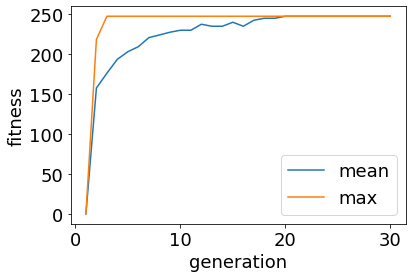

In [4]:
# テストデータ
#ITEMS = [(10, 7), (12, 9), (20, 16), (4, 1), (7, 2)] # (重さ，価値)

# ランダムにデータ生成
ITEMS = [(random.randint(0, 15), random.randint(0, 100)) for i in range (10)]
print('ITEMS:', ITEMS)

MAX_WEIGHT = 35 # 制限重量
N = 10          # 個体数
GENERATION = 30 # 世代数

# グラフ用リスト
g_list = []
mean_list = []
max_list = []

sim = Simulation(ITEMS, MAX_WEIGHT, N)
for i in range(GENERATION):
    print('generation:', i)
    g_list.append(i+1)
    sim.solve()
    
# グラフ生成
plt.rcParams["font.size"] = 18
plt.plot(g_list, mean_list, label='mean')
plt.plot(g_list, max_list, label='max')
plt.xlabel('generation')
plt.ylabel('fitness')
plt.legend()